<a href="https://colab.research.google.com/github/aykwan/titanickaggle/blob/main/Titanic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Titanic Dataset

Description:

Survived: 0 = Did not survive, 1 = Survived

Pclass: Passenger ticket class where 1 = First class, 2 = Second class, 3 = Third class

Sex: Male or female

Age: Age in years

SibSp: Number of siblings or spouses on the Titanic

Parch: Number of parents or children on the Titanic

Ticket: Passenger ticket number

Fare: Passenger fare

Cabin: Passenger cabin number

Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton

The first step to getting started is to preload the necessary packages. The Google Drive package has to be mounted in order to access my files.

In [36]:
#Import pandas, numpy and Mount the Google Drive
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the files and store into a data frame with pandas and load the first 5 rows of each dataset.

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic/test.csv")

In [21]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Determine the features that are categorical and numerical in nature.

In [23]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Passenger ID: Numerical; discrete

Survived: Categorical; nominal

Pclass: Categorical; nominal

Name: Categorical; nominal

Sex: Categorical; nominal

Age: Numerical; ratio

SibSp: Numerical, discrete

Parch: Numerical, discrete

Ticket: Categorical; nominal

Fare: Numerical; discrete

Cabin: Categorical; nominal

Embarked: Categorical; nominal

With these noted, some of the attributes needs to be converted to reflect their actual type:

-Survived

-Pclass

In [34]:
col = ['Pclass', 'Survived']
df_train[col] = df_train[col].astype('category')

#Note that "Survived" does not exist in the test file as this is dependent variable to predict
df_test['Pclass'] = df_test['Pclass'].astype('category')

df_train.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

Plot the attributes for each dataset

TypeError: ignored

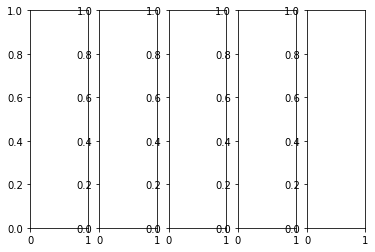

In [39]:
categorical_features = ["Survived", "Pclass", "Sex", "Cabin", "Embarked"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df_train[categorical_features]):
  df_train[categorical_feature].value_counts().plot("bar", ax=ax[i]).set_title(categorical_feature)
fig.show()